<a href="https://colab.research.google.com/github/jinwon1234/aipython/blob/main/%EA%B2%BD%EC%A0%9C%ED%95%99%EB%B6%80_%EC%9D%B4%EC%A7%84%EC%9B%90_202042170.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
plt.rc('font', family='NanumGothic')

In [4]:
df = pd.read_csv('example_data.csv')

문제 1: 데이터 파일 읽어오기



In [5]:
df

,학번,이름,학년,점수,분반,공부시간
0,1,신사임당,NaN,69,B,4
1,2,홍길동,1.0,92,B,3
2,3,강감찬,4.0,91,C,20
3,4,강감찬,2.0,70,C,5
4,5,강감찬,3.0,83,C,5
5,6,이순신,4.0,95,A,0
6,7,강감찬,4.0,71,C,1
7,8,김유신,NaN,88,B,5
8,9,신사임당,3.0,94,A,9
9,10,홍길동,NaN,60,B,3


문제 2: 데이터의 기본 정보 출력

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      20 non-null     int64  
 1   이름      17 non-null     object 
 2   학년      17 non-null     float64
 3   점수      20 non-null     int64  
 4   분반      20 non-null     object 
 5   공부시간    20 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ KB


문제 3: 데이터의 기초 통계량 출력

In [7]:
df.describe()

,학번,학년,점수,공부시간
count,20.00000,17.000000,20.000000,20.000000
mean,10.50000,2.823529,92.000000,4.450000
std,5.91608,1.185079,39.039791,5.771755
min,1.00000,1.000000,60.000000,0.000000
25%,5.75000,2.000000,69.750000,1.000000
50%,10.50000,3.000000,85.500000,3.000000
75%,15.25000,4.000000,94.250000,5.000000
max,20.00000,4.000000,200.000000,20.000000


문제 4: 결측치 확인하기


In [8]:
df.isnull().sum()

학번      0
이름      3
학년      3
점수      0
분반      0
공부시간    0
dtype: int64

In [9]:
df.isna().sum()

학번      0
이름      3
학년      3
점수      0
분반      0
공부시간    0
dtype: int64

문제 5: 이상치 확인하기

In [10]:
filter = (df['점수'] > 100) | (df['공부시간'] > 10)
df[filter]

,학번,이름,학년,점수,분반,공부시간
2,3,강감찬,4.0,91,C,20
10,11,NaN,1.0,200,C,0
11,12,신사임당,2.0,96,A,20
18,19,이순신,1.0,200,A,3


문제 6: 중복 데이터 확인하기


In [11]:
df.duplicated().sum()

0

문제 7: 중복 데이터 모두 확인하기

In [12]:
df[df.duplicated()]

,학번,이름,학년,점수,분반,공부시간


문제 8: 중복 데이터 삭제하기


In [13]:
df_drop = df.drop_duplicates()
df_drop

,학번,이름,학년,점수,분반,공부시간
0,1,신사임당,NaN,69,B,4
1,2,홍길동,1.0,92,B,3
2,3,강감찬,4.0,91,C,20
3,4,강감찬,2.0,70,C,5
4,5,강감찬,3.0,83,C,5
5,6,이순신,4.0,95,A,0
6,7,강감찬,4.0,71,C,1
7,8,김유신,NaN,88,B,5
8,9,신사임당,3.0,94,A,9
9,10,홍길동,NaN,60,B,3


문제 9: 이상치 데이터 처리하기


In [14]:
filter = (df_drop['점수'] <= 100) & (df['공부시간'] <= 10)
df2 = df_drop[filter]
df2

,학번,이름,학년,점수,분반,공부시간
0,1,신사임당,NaN,69,B,4
1,2,홍길동,1.0,92,B,3
3,4,강감찬,2.0,70,C,5
4,5,강감찬,3.0,83,C,5
5,6,이순신,4.0,95,A,0
6,7,강감찬,4.0,71,C,1
7,8,김유신,NaN,88,B,5
8,9,신사임당,3.0,94,A,9
9,10,홍길동,NaN,60,B,3
12,13,김유신,4.0,65,A,0


문제 10: 데이터 그룹핑


In [15]:
group_mean = df2.groupby('분반')['점수'].mean().reset_index()
group_mean

,분반,점수
0,A,77.75
1,B,77.25
2,C,80.50


문제 11: 데이터 시각화


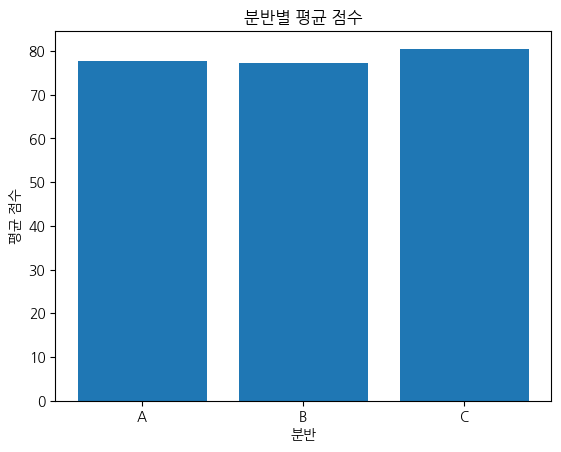

In [21]:
plt.bar(group_mean['분반'],group_mean['점수'])
plt.title('분반별 평균 점수')
plt.xlabel('분반')
plt.ylabel('평균 점수')
plt.show()

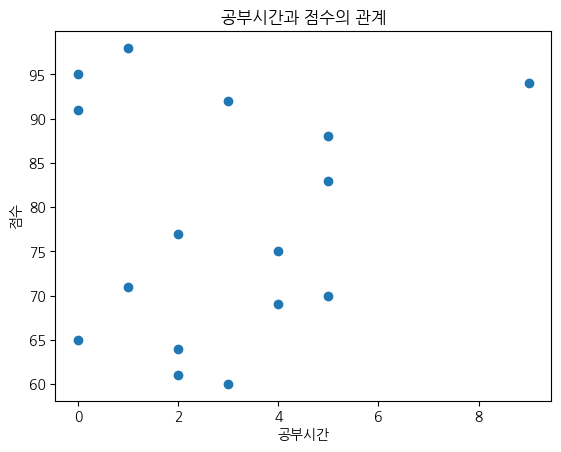

In [24]:
plt.scatter(df2['공부시간'],df2['점수'])
plt.title('공부시간과 점수의 관계')
plt.xlabel('공부시간')
plt.ylabel('점수')
plt.show()